In [1]:
import os 
import pandas as pd 
import sys 
import re 

current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    
from jupyter_ipynb.NetMob_training_analysis.plotting import plot_boxplot_on_metric
from experiences.convert_df_to_latex import update_df_metrics,load_csv
from experiences.convert_df_to_latex import tackle_trial_j as tackle_trial_for_distrib
from experiences.common_results import dic_exp_to_names,dic_trials,folder_path,metrics

# exp_i = 'Exp6_subway_netmob'
exp_i = 'Exp6_bike_netmob'
h = 1
trials = dic_trials[exp_i]
print(f"\n------------------ {exp_i} ---")
metrics = ['rmse','mae','mase']
L_metrics = []

def tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics):
    df_j_all = pd.DataFrame()
    metric_i = []
    for n_bis in range(1,6):
        df_j_all, metric_i = load_csv(folder_path,dic_exp_to_names,exp_i,trial_j,n_bis,df_j_all,metric_i,metrics)
    
    if len(metric_i) > 0: 
        metric_i = pd.DataFrame(metric_i)
        metric_i.index = [f"{trial_j}_bis{n_bis}" for n_bis in range(1,6)]
        L_metrics.append(metric_i)

    return L_metrics


for trial_j in trials:
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics)

df_metrics_all = pd.concat(L_metrics)

horizons = list(set([c.split('_')[-1][1:] for c in df_metrics_all.columns]))
for horizon in horizons:
    print('\n----------------')
    print(f"Horizon: {horizon}")
    df_horizon = df_metrics_all[[c for c in df_metrics_all.columns if c.endswith(f"_h{horizon}")]].dropna()

    df_horizon = update_df_metrics(df_horizon,exp_i)

    plot_boxplot_on_metric(df_horizon, metric_i='mae', xaxis_label="Config", legend_group='legend_group', width=1200, height=800, 
                                save_path=None)
    # plot_boxplot_on_metric(df_horizon, metric_i='mase', xaxis_label="Config", legend_group='legend_group', width=1200, height=400, 
    #                             save_path=None)
    plot_boxplot_on_metric(df_horizon, metric_i='rmse', xaxis_label="Config", legend_group='legend_group', width=1200, height=800, 
                                save_path=None)


------------------ Exp6_bike_netmob ---

----------------
Horizon: 1


Loading BokehJS ...

Loading BokehJS ...


----------------
Horizon: 4


Loading BokehJS ...

Loading BokehJS ...

Trial ID 1:  _STAEformer_subway_in_calendar__e150_h4_bis1_f5
Trial ID 2:  _STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h4_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp6_subway_netmob/subway_in_STAEformer/best_models/STAEformer_subway_in_calendar__e150_h4_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

>>>Loading calendar inputs ...
I

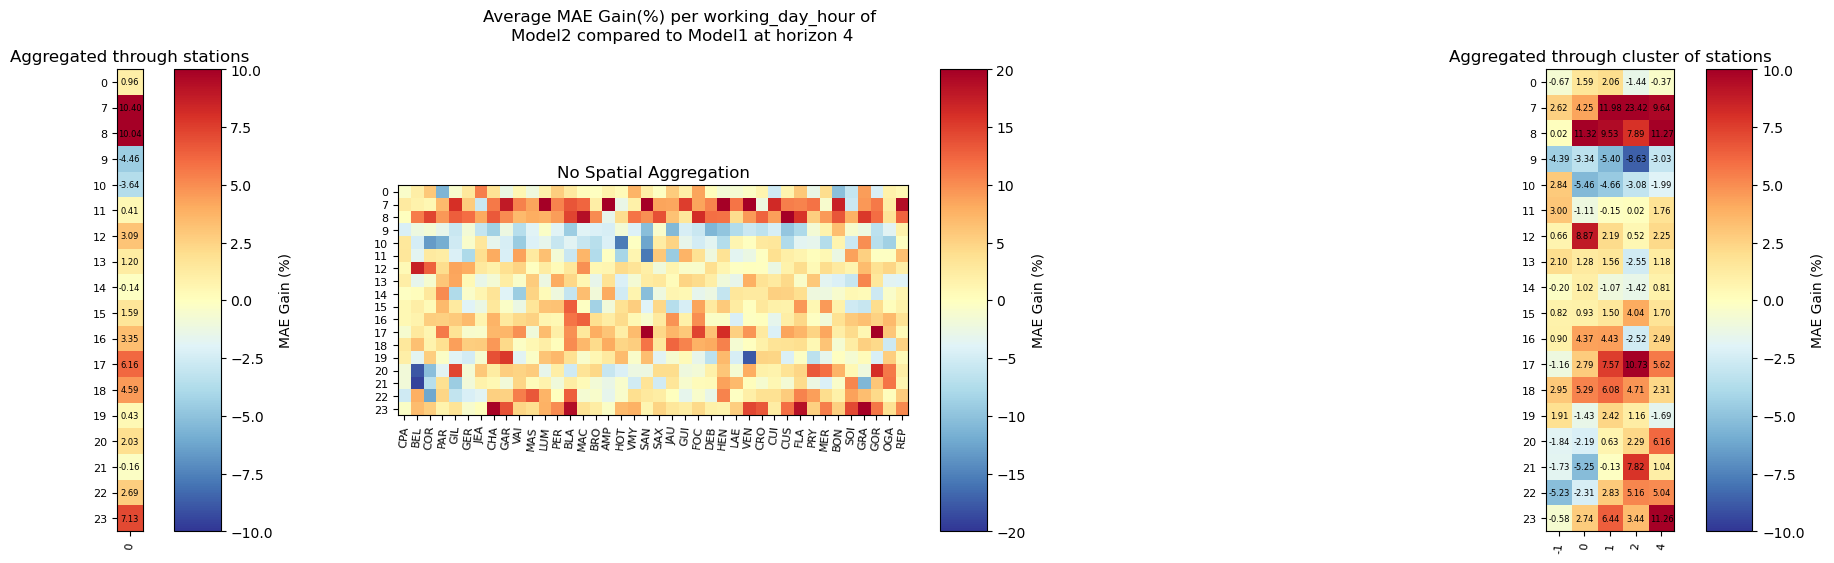

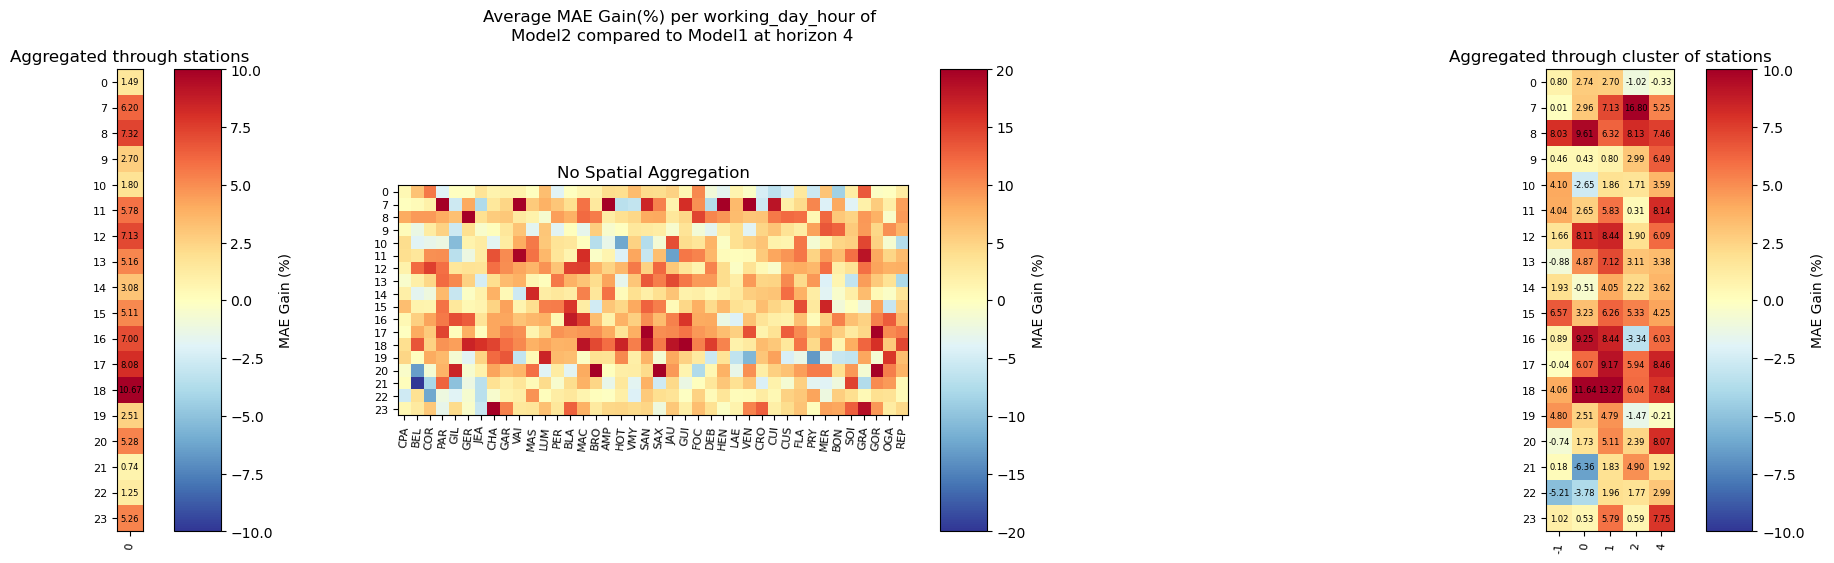

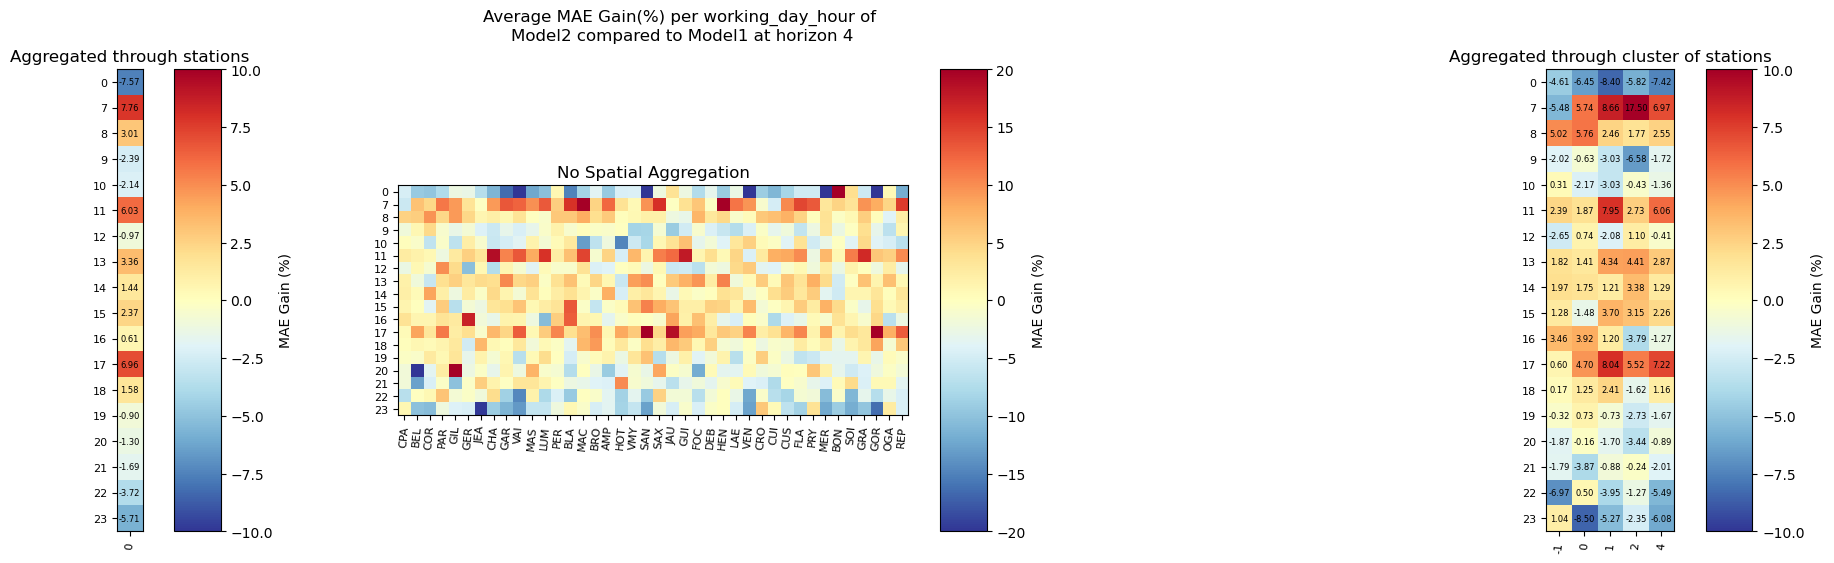

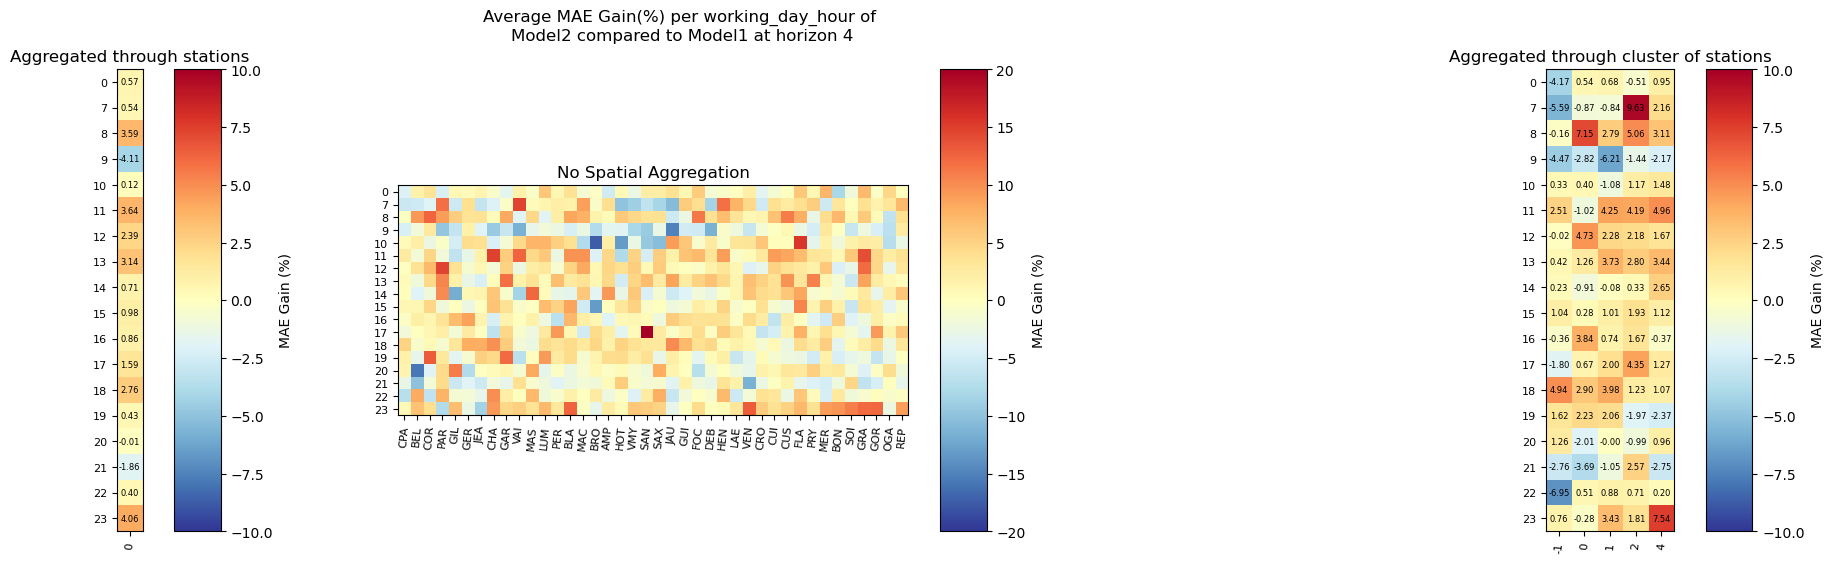

In [13]:
from examples.accuracy_comparison import get_rainy_indices,get_model_args,get_desagregated_comparison_plot

folder = 'Exp6_subway_netmob' # 'Exp4' # 'Exp4_15min'
target_data = 'subway_in'
model_name = 'STAEformer'
h = 4 # 4
station_clustering = True

station = 'CHA'
range_k = range(1,6)

trial_ids1 = [
                f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                f'STAEformer_subway_in_calendar__e150_h{h}_bis',
                ]

trial_ids2 = [
                f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24_aggIris100__e150_h{h}_bis',
                f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb8_adp16_adpQ24_aggIris100__e150_h{h}_bis',
                f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb48_adp16_adpQ24_aggIris100__e150_h{h}_bis',
                f'STAEformer_subway_in_netmob_POIs_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb24_adp16_adpQ24__e150_h{h}_bis',
            ]
    

trial_id1_in_bis = False
trial_id2_in_bis = False

 
save_folder_name = f'{folder}/{target_data}_{model_name}' 
save_folder_name_bis = f'{folder}/{target_data}_{model_name}'


for trial_id1,trial_id2 in zip(trial_ids1,trial_ids2):
    model_args,model_args_bis,path_model_args,path_model_args_bis = get_model_args(save_folder_name,save_folder_name_bis)
    
    clusterer,full_predict1,full_predict2,train_input,Y_true,L_trainer1,L_trainer2,ds1,ds2,args_init1,args_init2 = get_desagregated_comparison_plot(trial_id1,trial_id2,
                                                                                        model_name = model_name,
                                                                                        model_args = model_args,
                                                                                        model_args_bis = model_args_bis,
                                                                                        path_model_args = path_model_args,
                                                                                        path_model_args_bis = path_model_args_bis,
                                                                                        range_k = range_k,
                                                                                        target_data = target_data,
                                                                                        trial_id1_in_bis=False,
                                                                                        trial_id2_in_bis=False,
                                                                                        vmax_coeff = 4,
                                                                                        station = station,
                                                                                        temporal_agg_for_matshow_attn_weight = ['all_day'],
                                                                                        temporal_agg_for_folium_map = ['morning_peak','evening_peak'], # ['morning_peak','evening_peak','all_day','off_peak','business_day','bank_holiday']
                                                                                        comparison_on_rainy_events = False,
                                                                                        station_clustering = station_clustering
                                                                                        )
    


# Analysing Attention Weights

<Figure size 2000x1000 with 0 Axes>

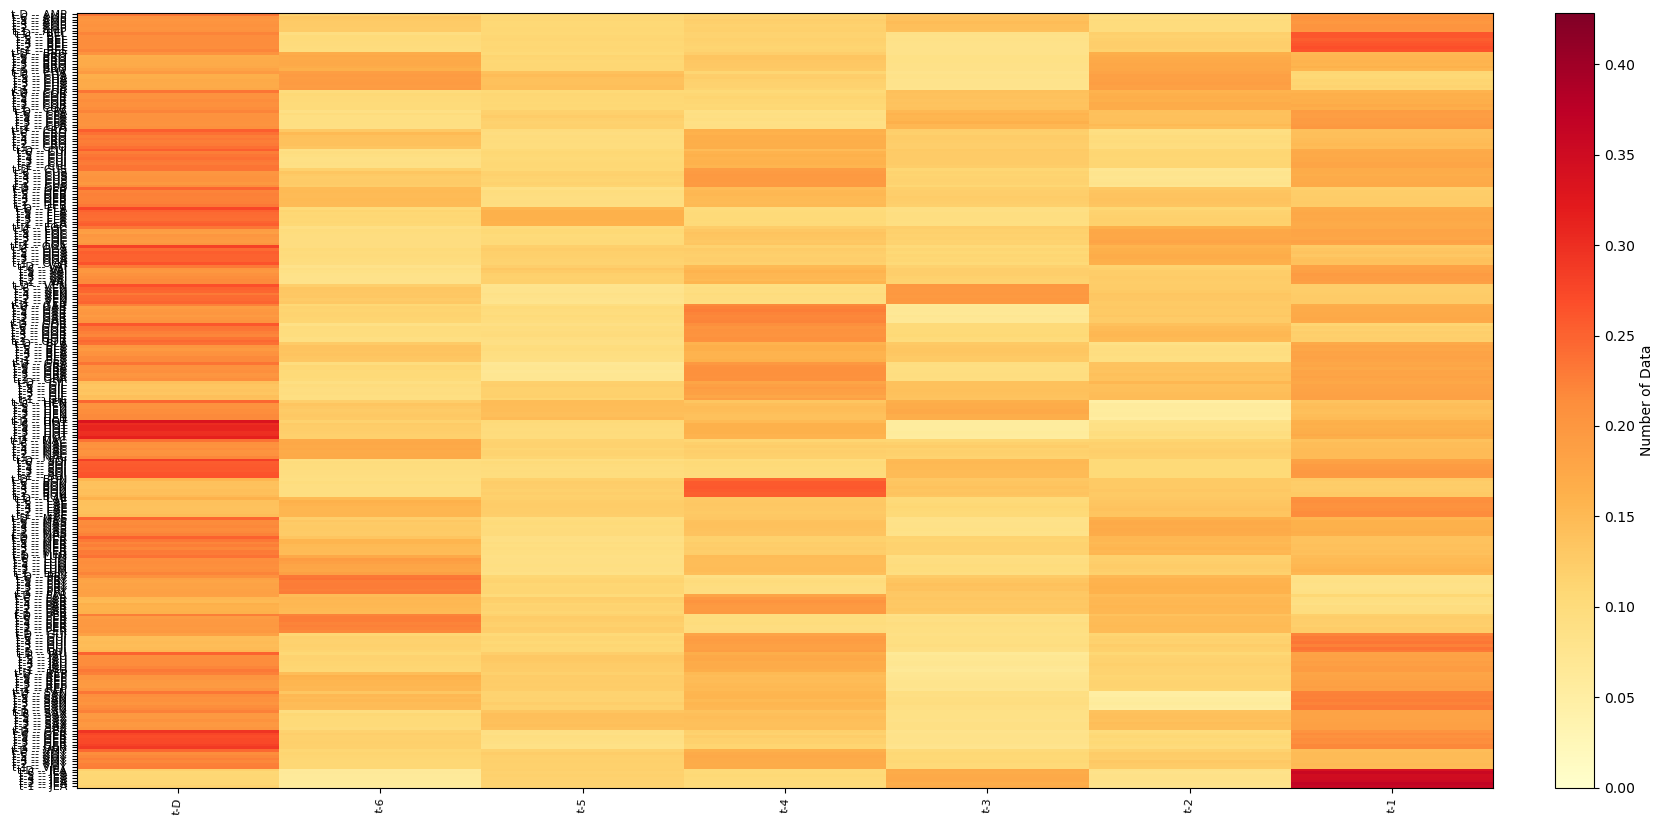

<Figure size 2000x1000 with 0 Axes>

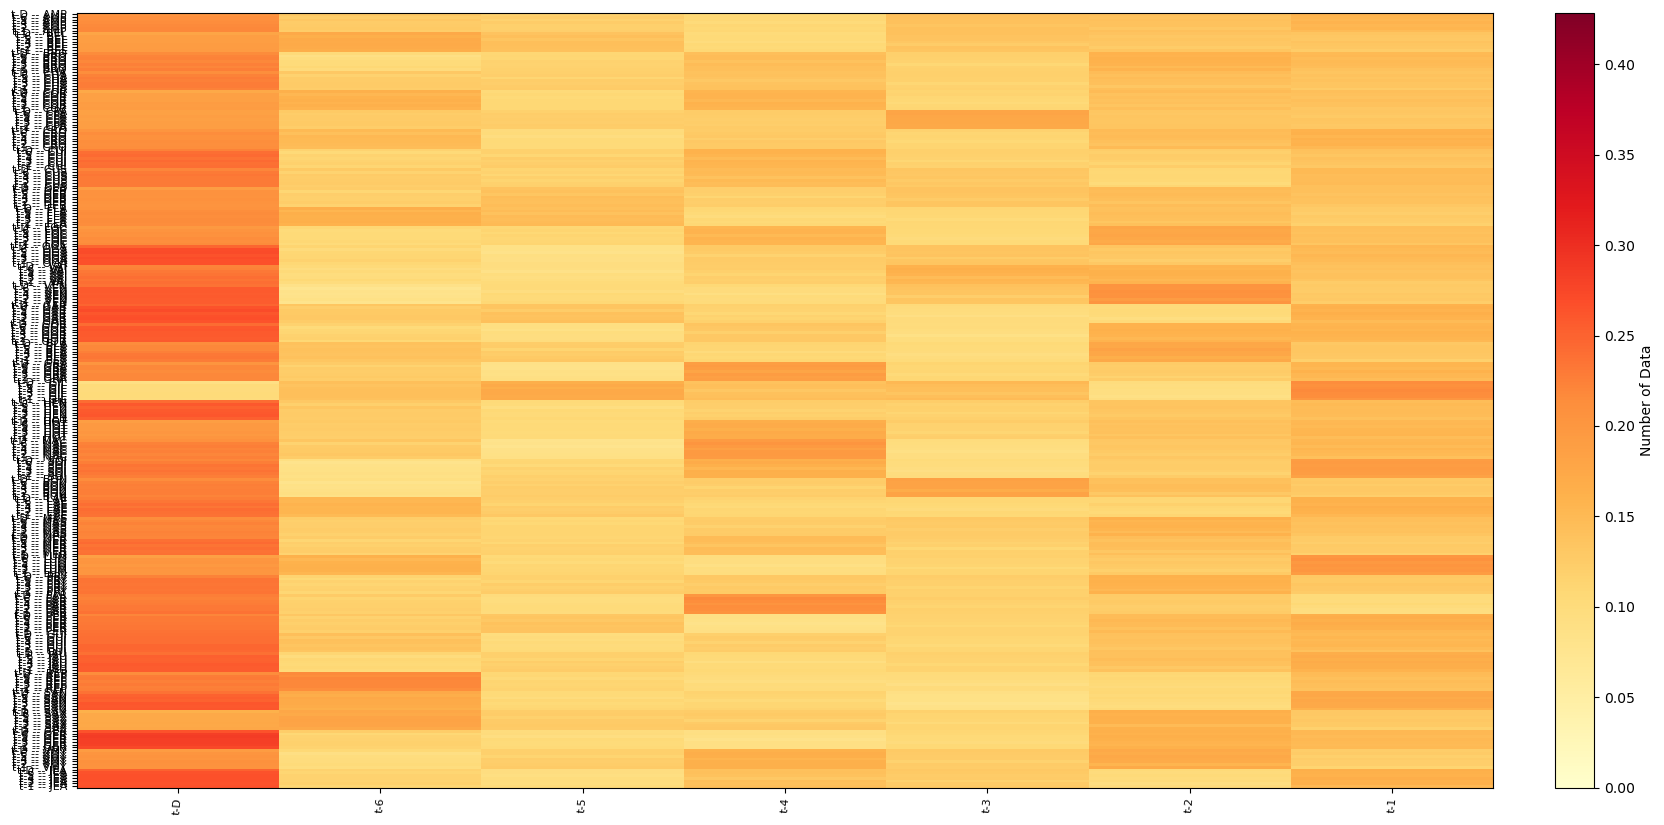

<Figure size 2000x1000 with 0 Axes>

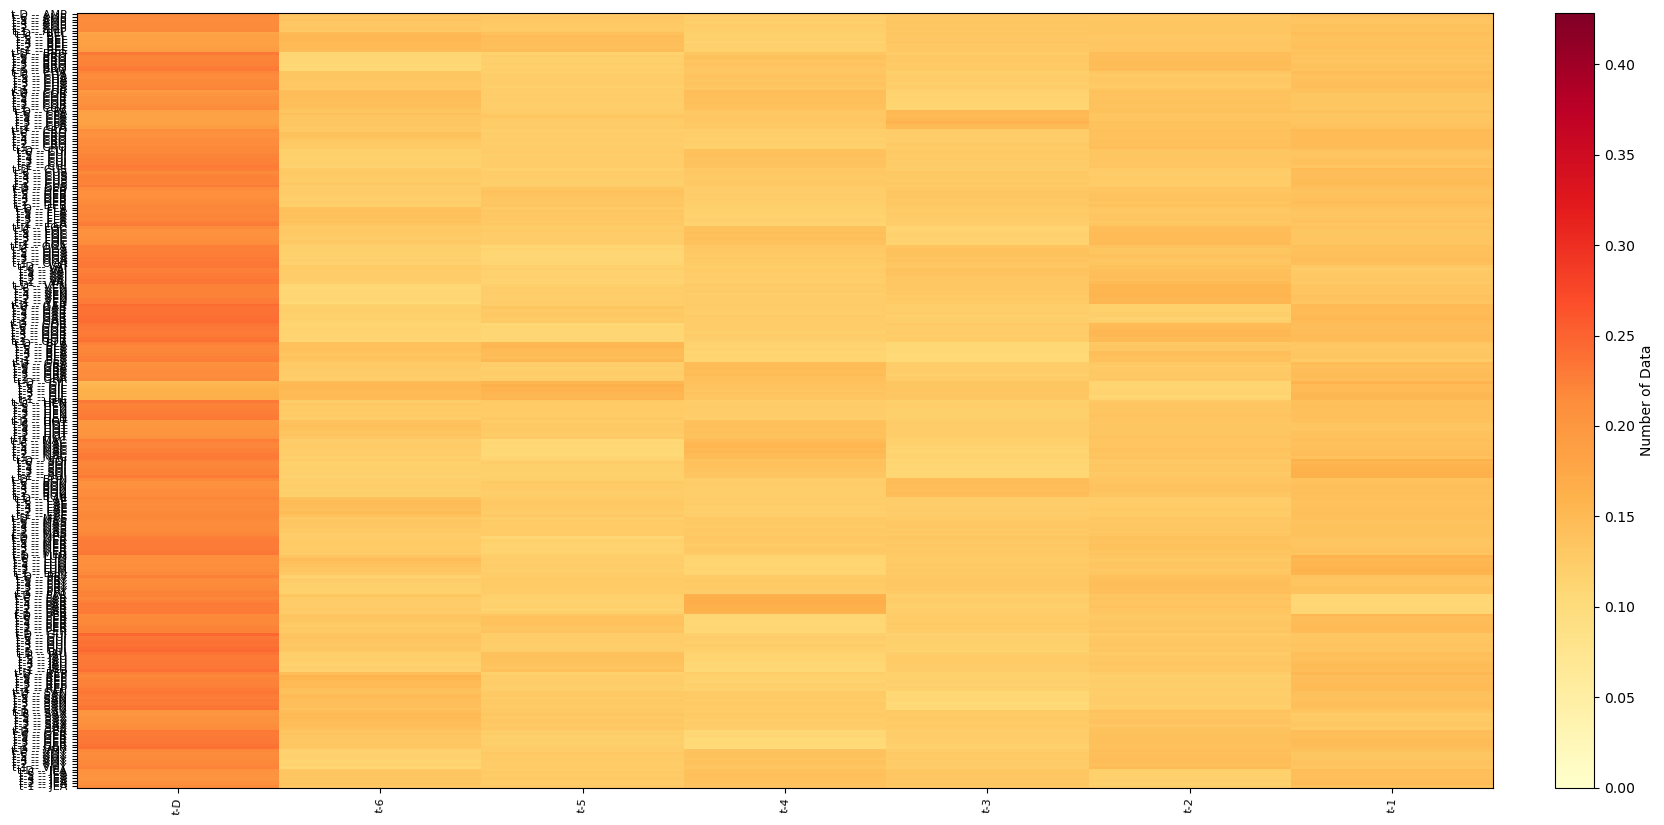

<Figure size 2000x1000 with 0 Axes>

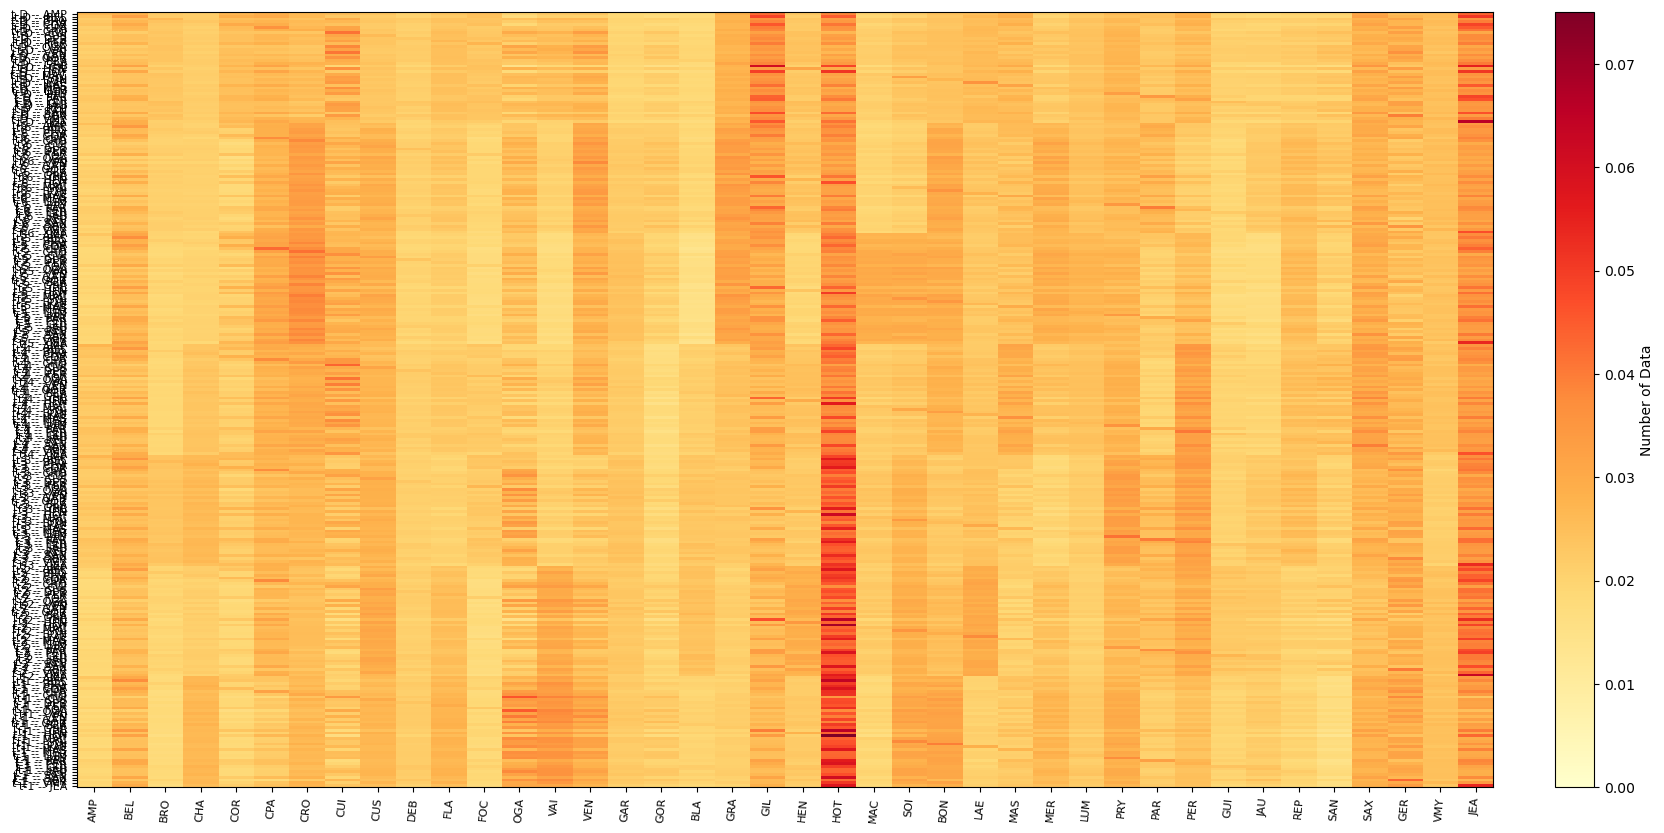

<Figure size 2000x1000 with 0 Axes>

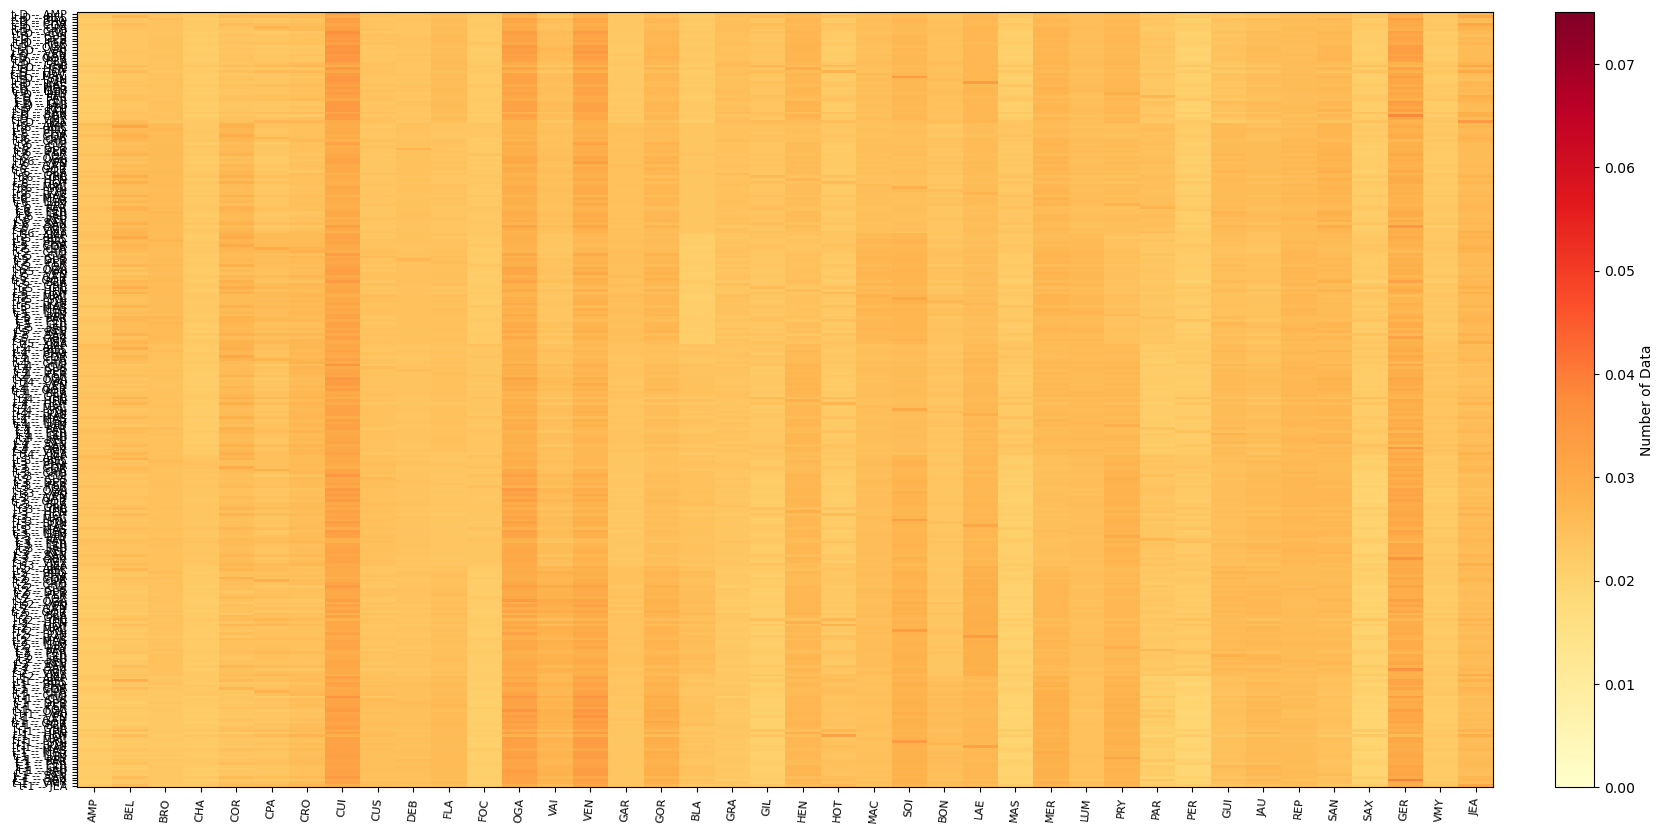

<Figure size 2000x1000 with 0 Axes>

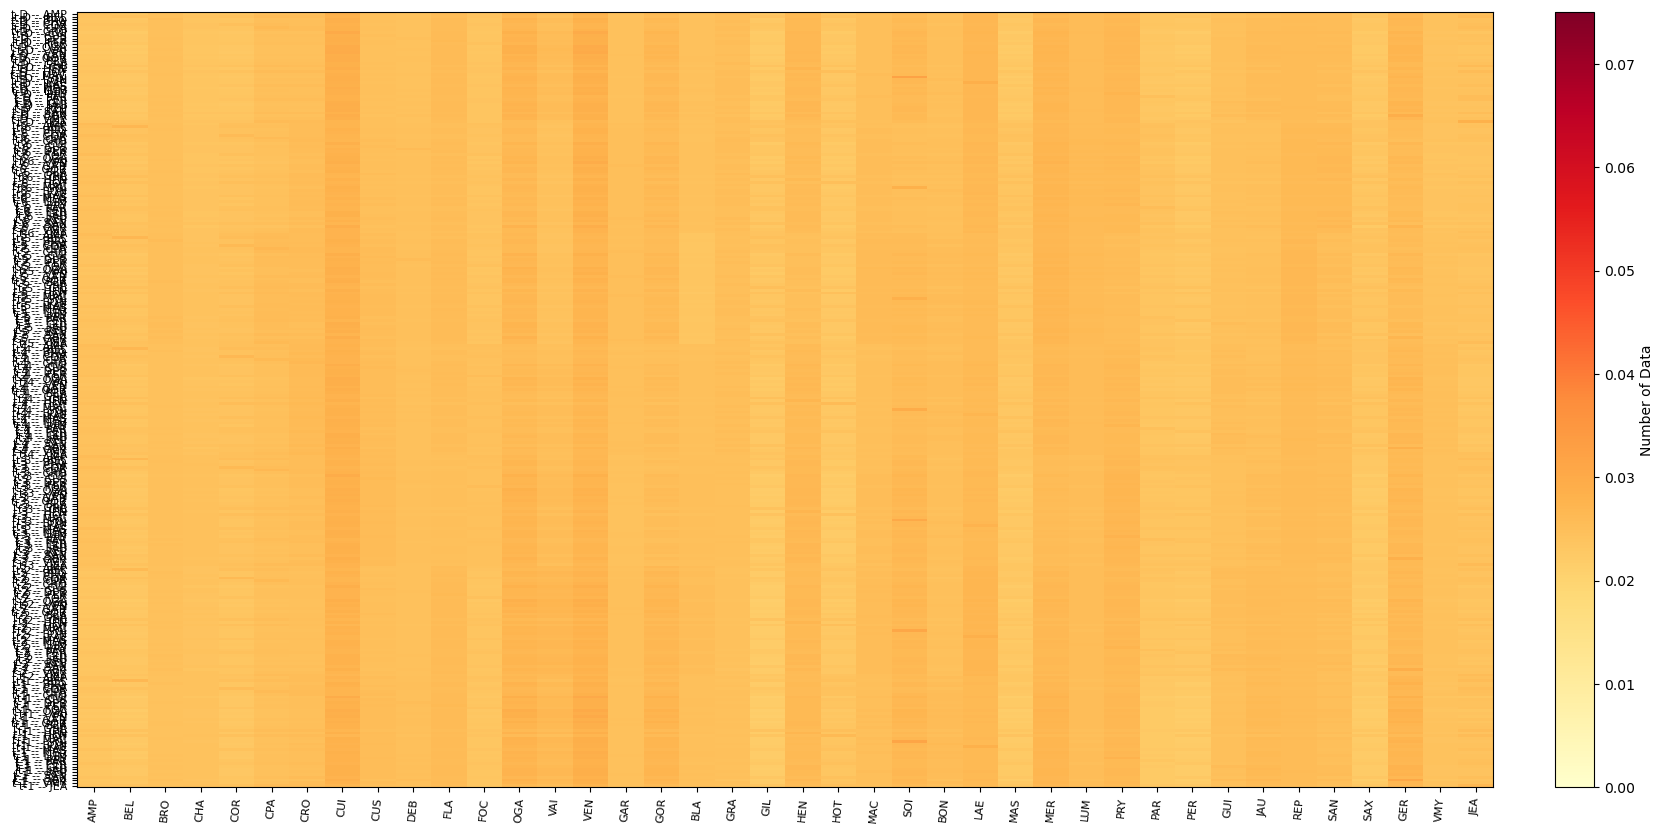

In [4]:
import torch 
from pipeline.plotting.plotting import plot_coverage_matshow
import matplotlib.pyplot as plt 
trainer1, trainer2 = L_trainer1[0],L_trainer2[0]


trainer = trainer1
args_init = args_init1
ds = ds1


X = torch.cat([x for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Y = torch.cat([y for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc0 = torch.cat([x_c[0] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc1 = torch.cat([x_c[1] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
model = trainer.model
model.eval()
with torch.no_grad():
    pred = model(X,[Xc0,Xc1])

columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

if hasattr(trainer.model,'_orig_mod'):
   t_layers = trainer.model._orig_mod.core_model.attn_layers_t
else:
   t_layers = trainer.model.core_model.attn_layers_t
for temporal_layer in range(len(t_layers)):
  attn_score = t_layers[temporal_layer].attn.attn_score.detach().cpu()     # attn_score.size : torch.Size([19956, 40, 7, 7]) - - [B,N,L,L] 
  mean_attn_score = attn_score.mean(0)                                                                             #  mean_attn_score.size(): [40, 7, 7]             - -   [N,L,L]
  df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.shape[-1]).numpy(),columns=columns,index=[f"{hist} -- {station_name}"   for station_name in ds.spatial_unit for hist in columns] )
  figsize=(20,10)
  matfig = plt.figure(figsize=figsize)
  plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False,
                          v_min=0,v_max=3*(1/df_attn_weight.shape[1]),
                          #   display_values = False,
                            bool_plot = True,
                            cbar_magic_args = True,
                            figsize = figsize
  )


t_columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

if hasattr(trainer.model,'_orig_mod'):
   s_layers = trainer.model._orig_mod.core_model.attn_layers_s
else:
   s_layers = trainer.model.core_model.attn_layers_s

for temporal_layer in range(len(s_layers)):
  attn_score = s_layers[temporal_layer].attn.attn_score.detach().cpu()
  mean_attn_score = attn_score.mean(0)
  df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.shape[-1]).numpy(),columns=ds.spatial_unit,index=[f"{hist} -- {station_name}"   for hist in t_columns  for station_name in ds.spatial_unit] )
  figsize=(20,10)
  matfig = plt.figure(figsize=figsize)
  plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False,
                           v_min=0,v_max=3*(1/df_attn_weight.shape[1]),
                          #   display_values = False,
                            bool_plot = True,
                            cbar_magic_args = True,
                            figsize = figsize
  )

<Figure size 2000x1000 with 0 Axes>

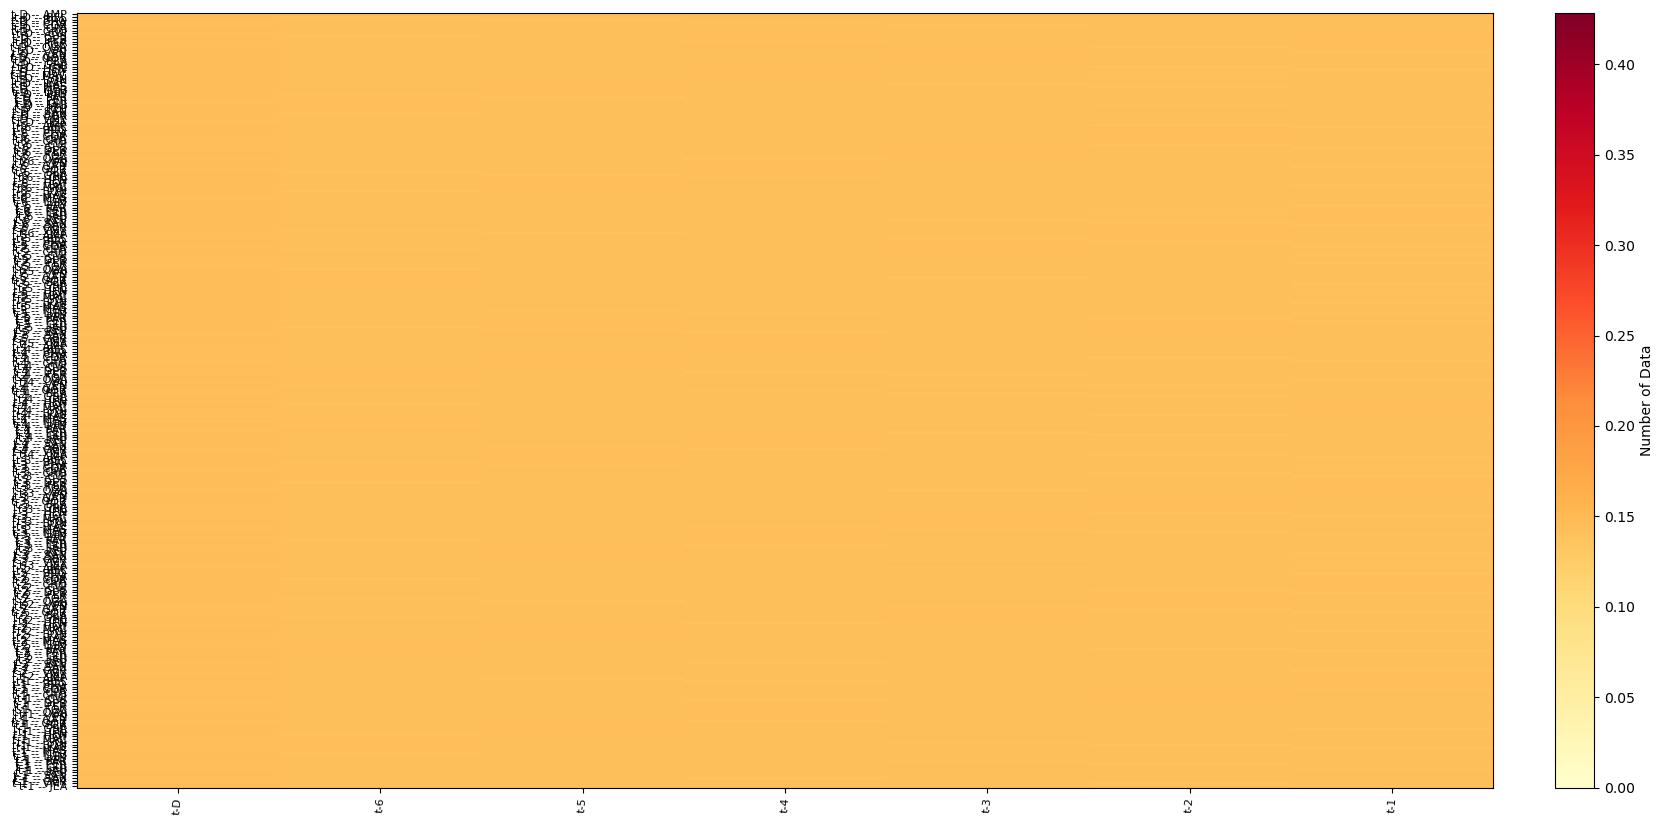

<Figure size 2000x1000 with 0 Axes>

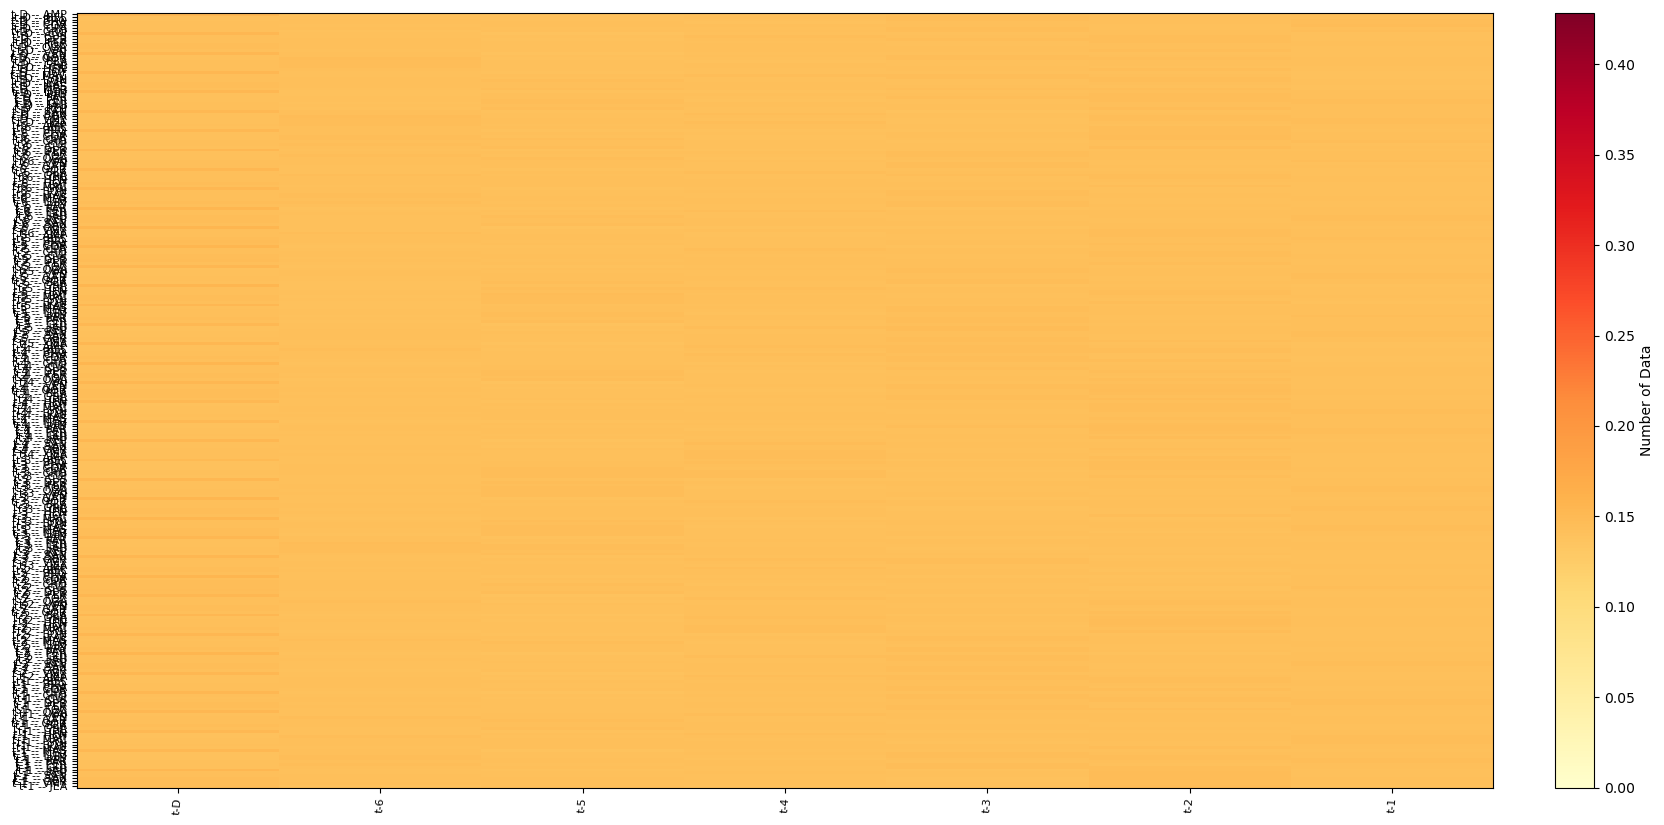

<Figure size 2000x1000 with 0 Axes>

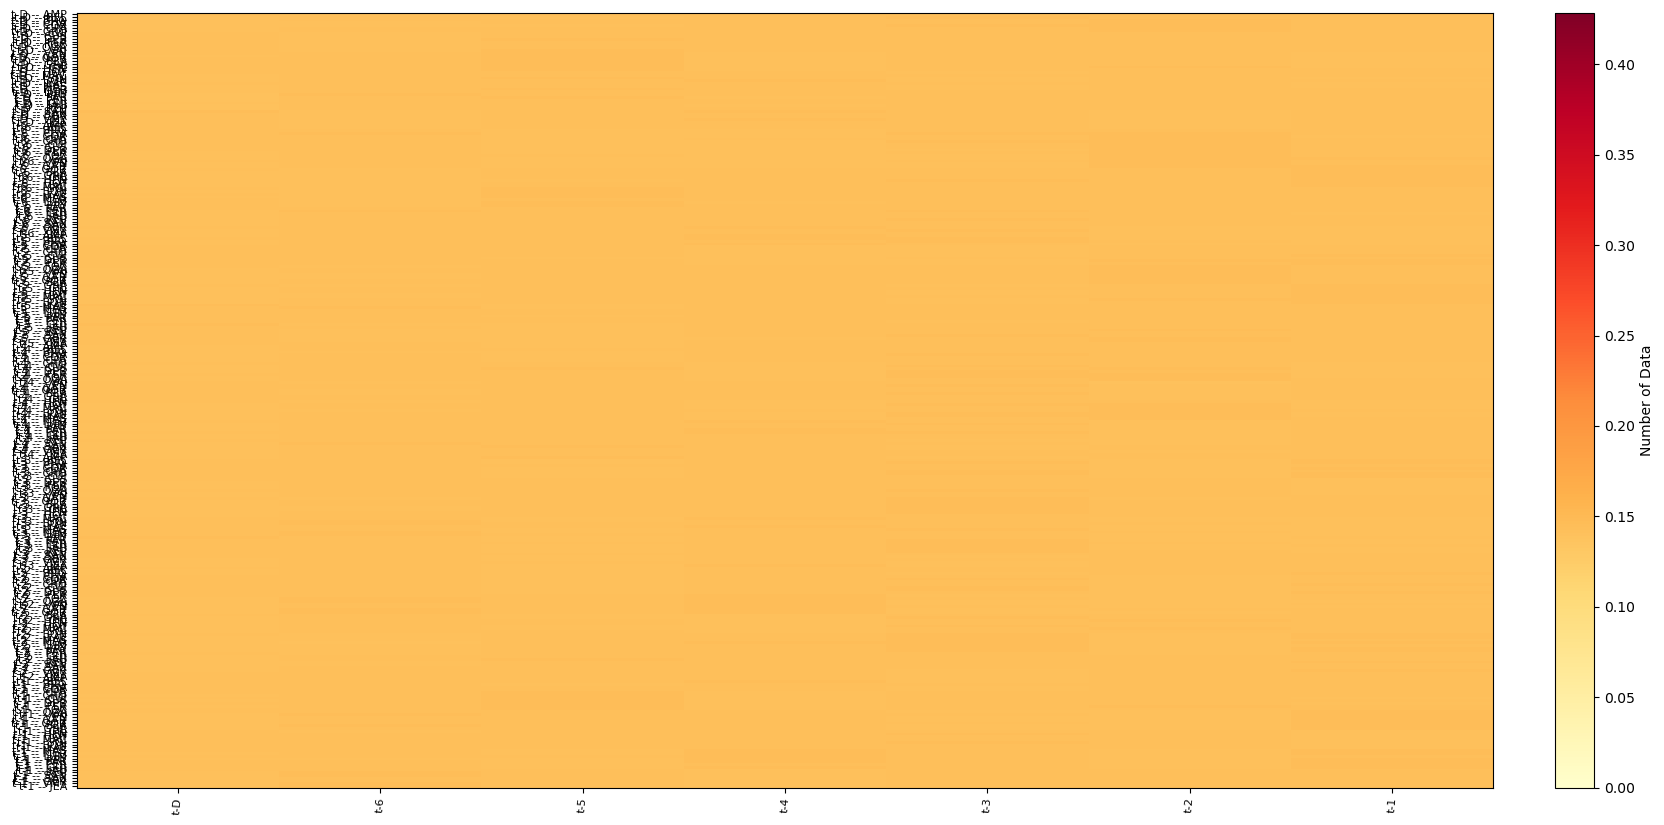

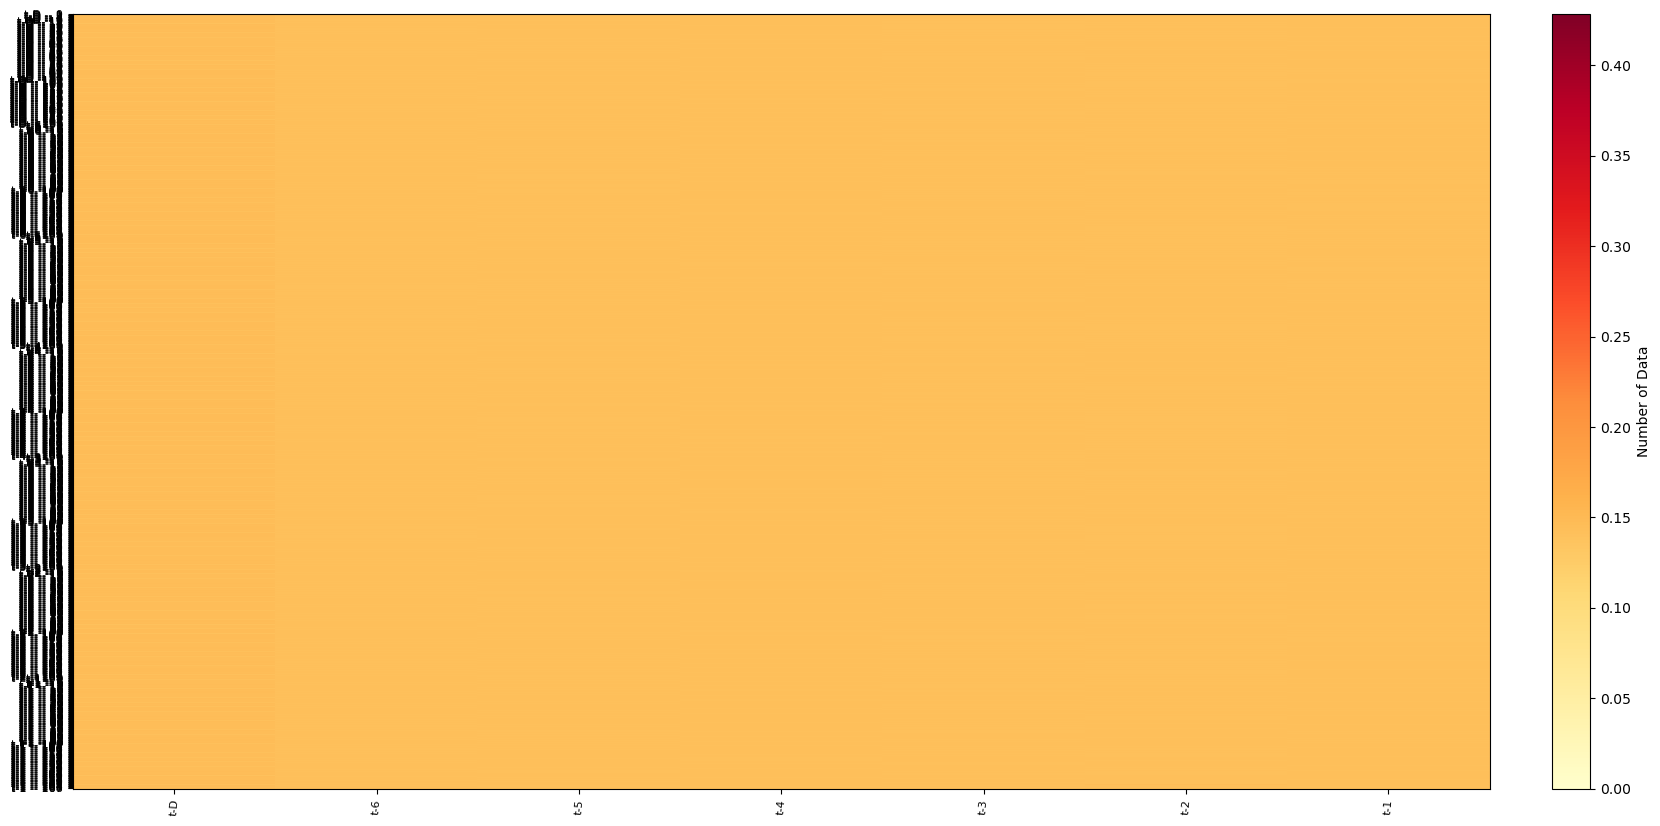

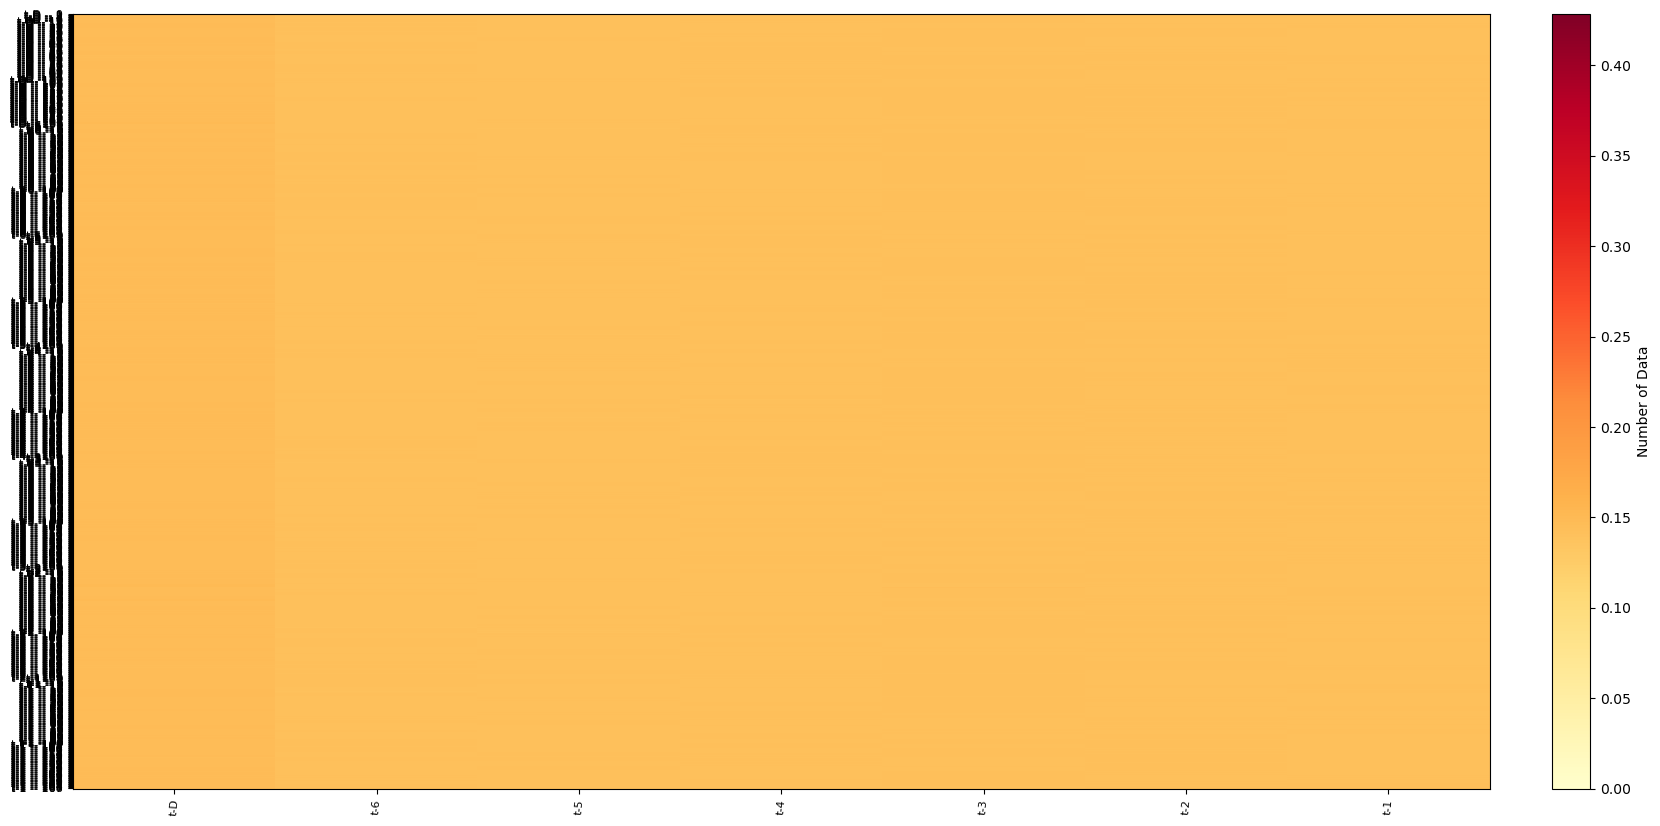

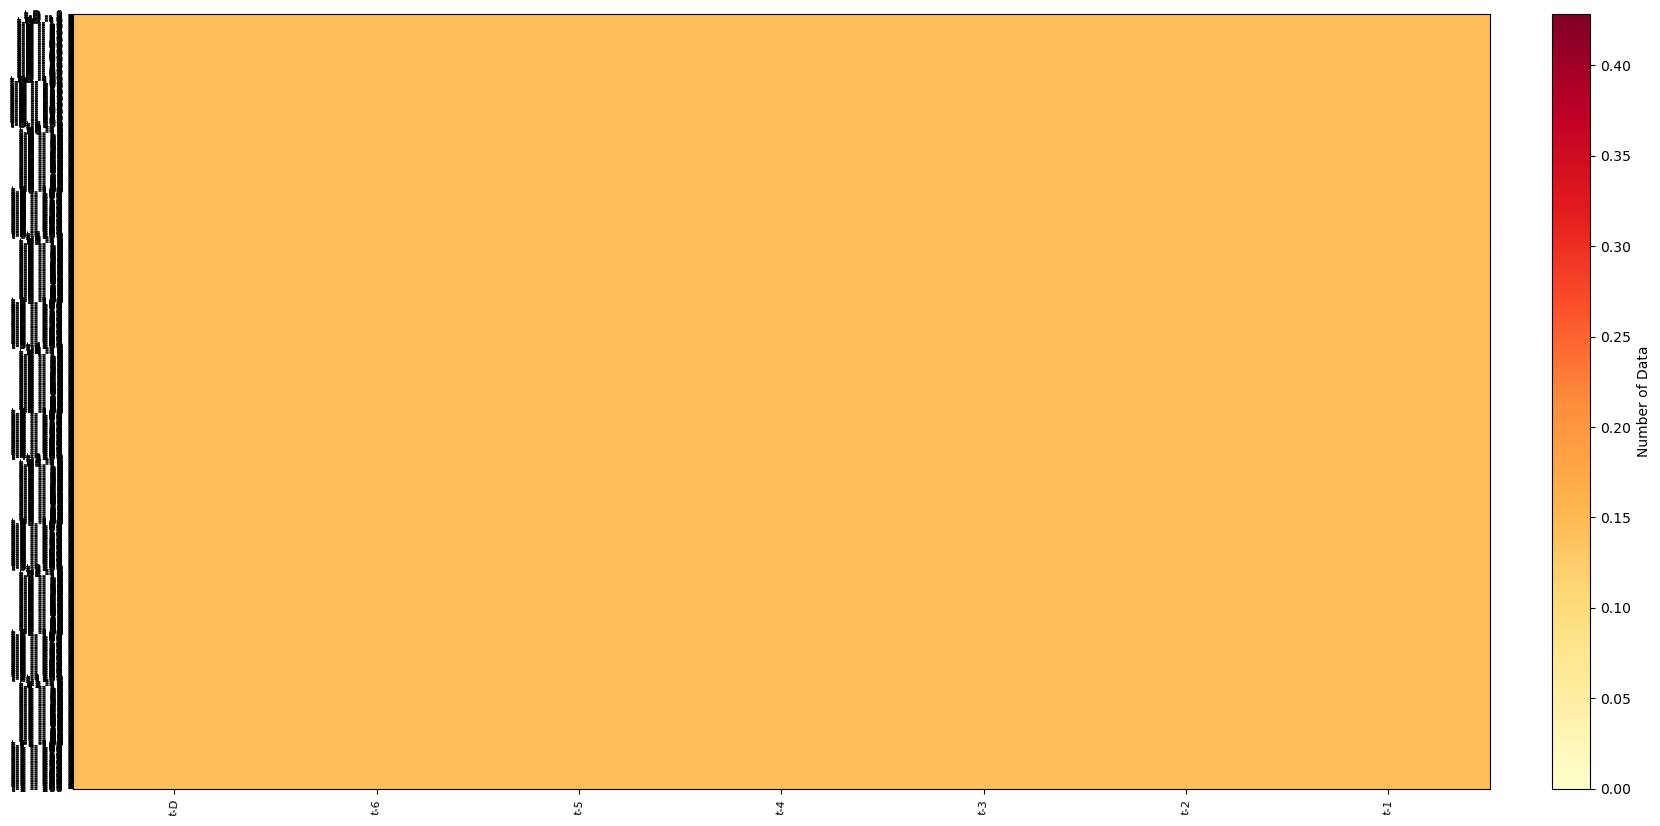

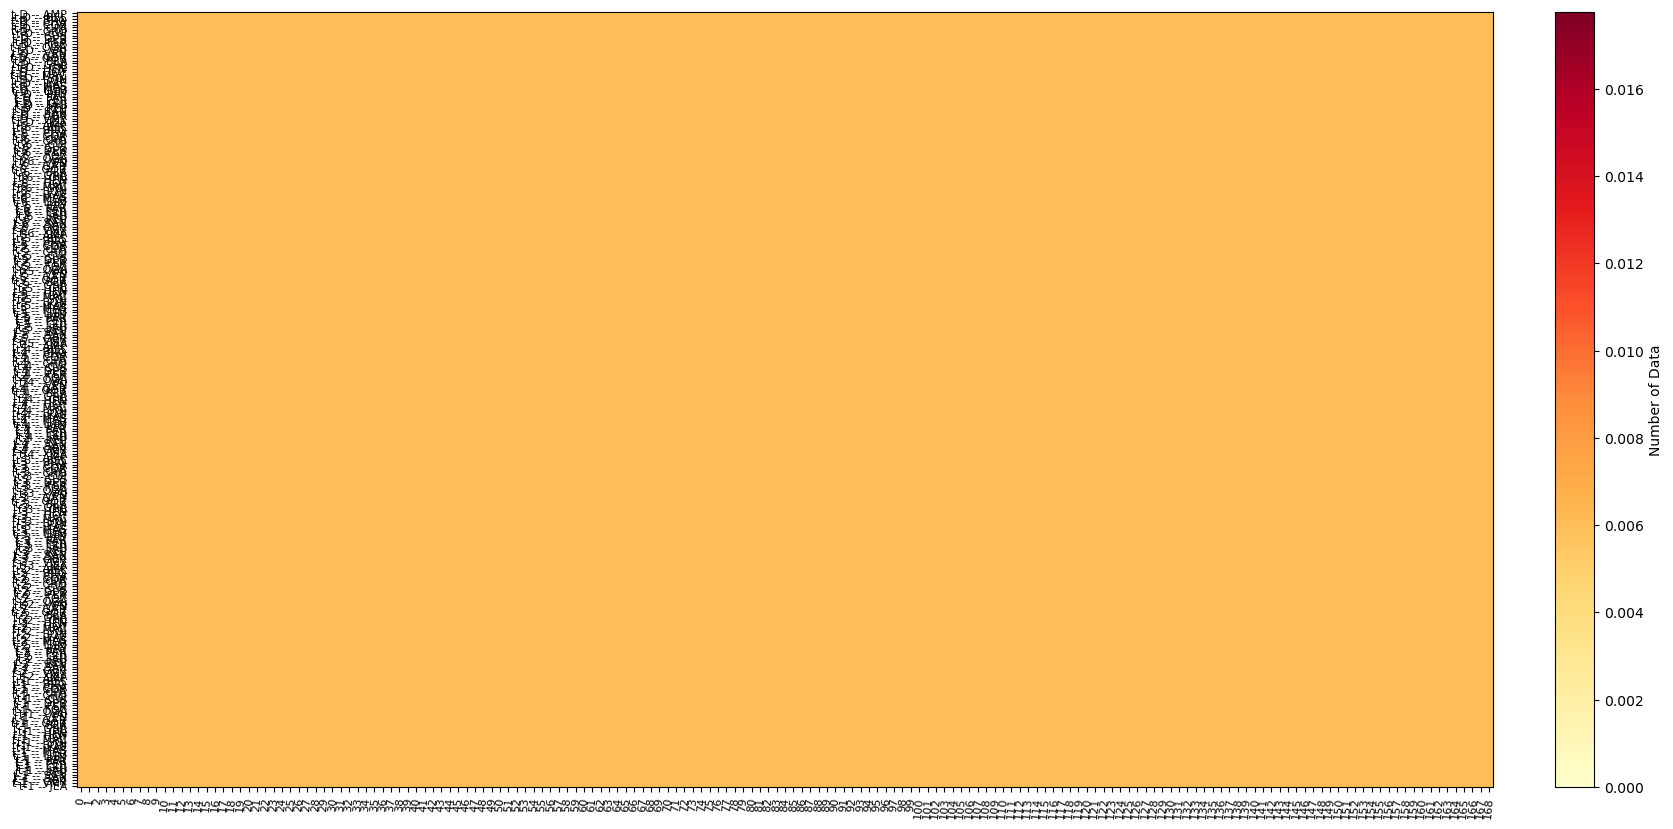

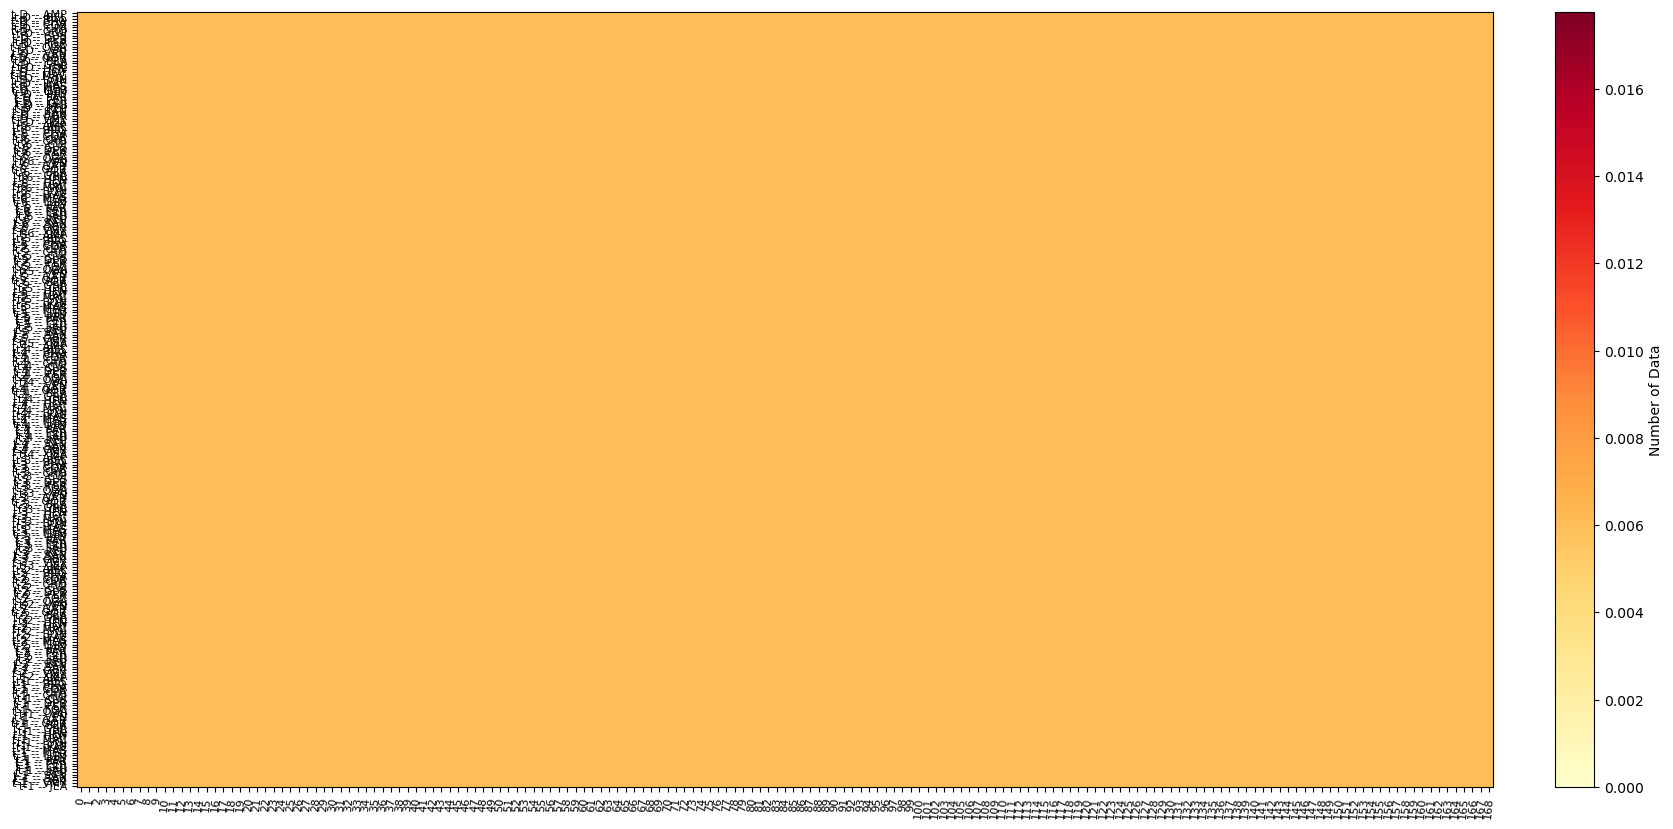

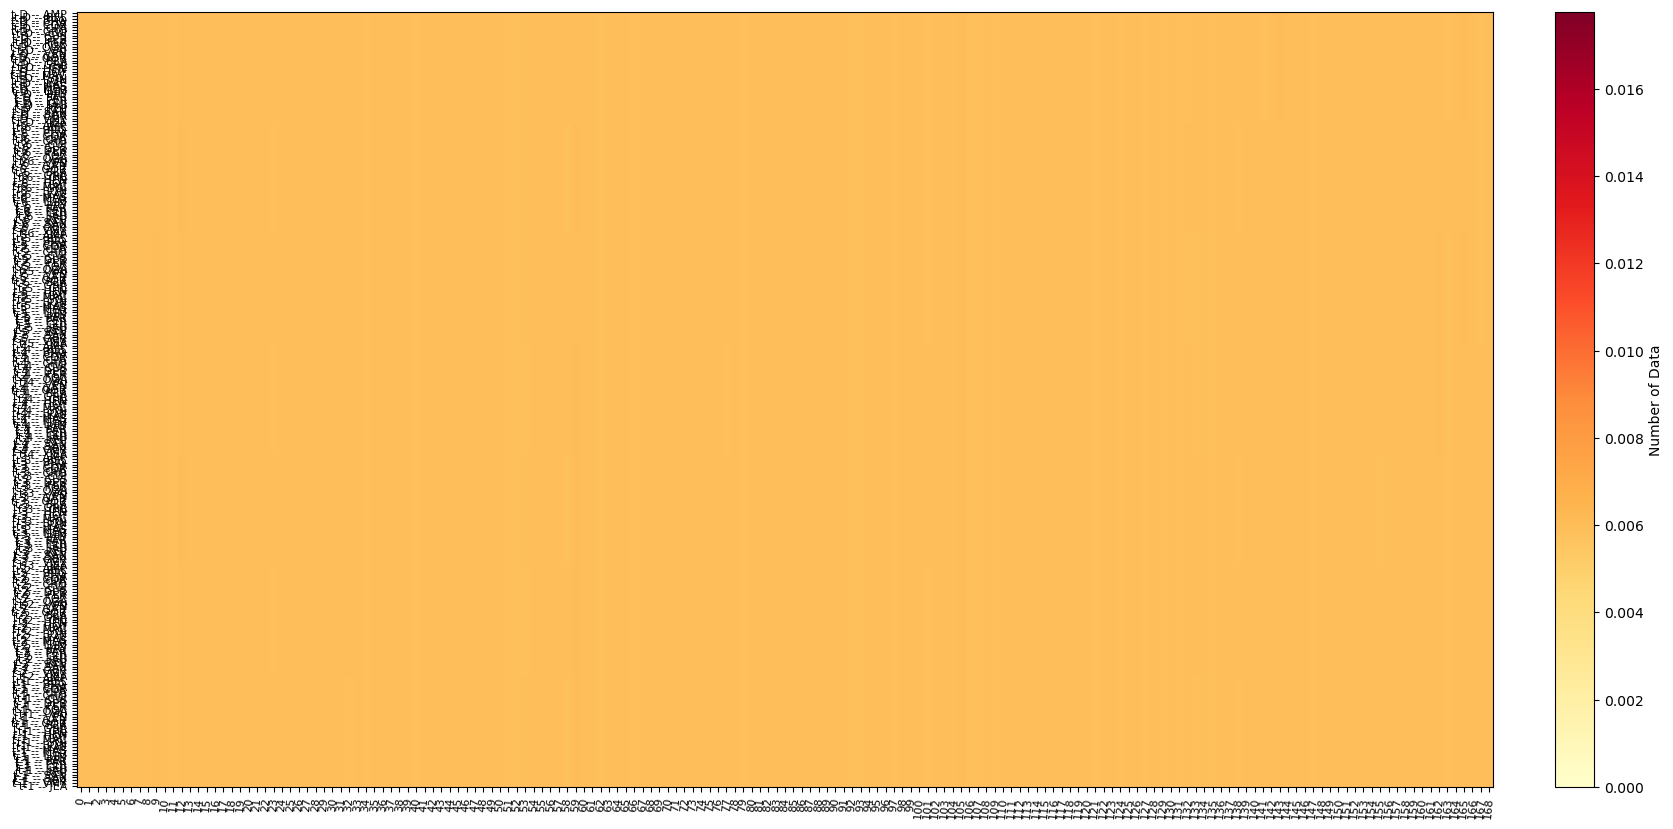

In [7]:
trainer = trainer2
ds = ds2
args_init = args_init2 
ds_name = 'netmob_POIs'
t_columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

# Forward on test set to get Attention weights: 
all_data = [tensors for tensors in zip(*trainer.dataloader['test'])]
X = torch.cat(all_data[0]).to(args_init.device)
Y = torch.cat(all_data[1]).to(args_init.device)
Xc = [torch.cat(context_tensors).to(args_init.device) for context_tensors in zip(*all_data[2])]
model = trainer.model
model.eval()
with torch.no_grad():
    pred = model(X, Xc)
# ---

if hasattr(trainer.model.global_s_attn[f'{ds_name}'].model,'Q_attn_layers_t'):
    Q_attn_layers_t = trainer.model.global_s_attn[f'{ds_name}'].model.Q_attn_layers_t
    KV_attn_layers_t = trainer.model.global_s_attn[f'{ds_name}'].model.KV_attn_layers_t
    attn_layers_s = trainer.model.global_s_attn[f'{ds_name}'].model.attn_layers_s
else:
    attn_layers_t = trainer.model.global_s_attn[f'{ds_name}'].model.attn_layers_t
    attn_layers_s = trainer.model.global_s_attn[f'{ds_name}'].model.attn_layers_s


# --- Analysis of ST-Attention Weights associated to the contextual datasets: ---
for mha_layer in range(len(Q_attn_layers_t)):
    attn_score = Q_attn_layers_t[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)
    df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.size(-1)).numpy(),
                                columns = t_columns,
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in ds.spatial_unit] )  # args_init.contextual_kwargs['netmob_POIs']['spatial_unit']
    figsize=(20,10)
    matfig = plt.figure(figsize=figsize)
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = figsize)
    
    # ---

for mha_layer in range(len(KV_attn_layers_t)):
    attn_score = KV_attn_layers_t[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)
    df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.size(-1)).numpy(),
                                columns = t_columns,
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in args_init.contextual_kwargs['netmob_POIs']['spatial_unit']] )  # 
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = figsize)
    # ---


for mha_layer in range(len(attn_layers_s)):
    attn_score = attn_layers_s[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)
    df_attn_weight = pd.DataFrame(mean_attn_score.reshape(-1,mean_attn_score.size(-1)).numpy(),
                                columns = args_init.contextual_kwargs[ds_name]['spatial_unit'],
                                index =[f"{hist} -- {s_unit}"   for hist in columns for s_unit in ds.spatial_unit] )
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = figsize)
    
    # ---


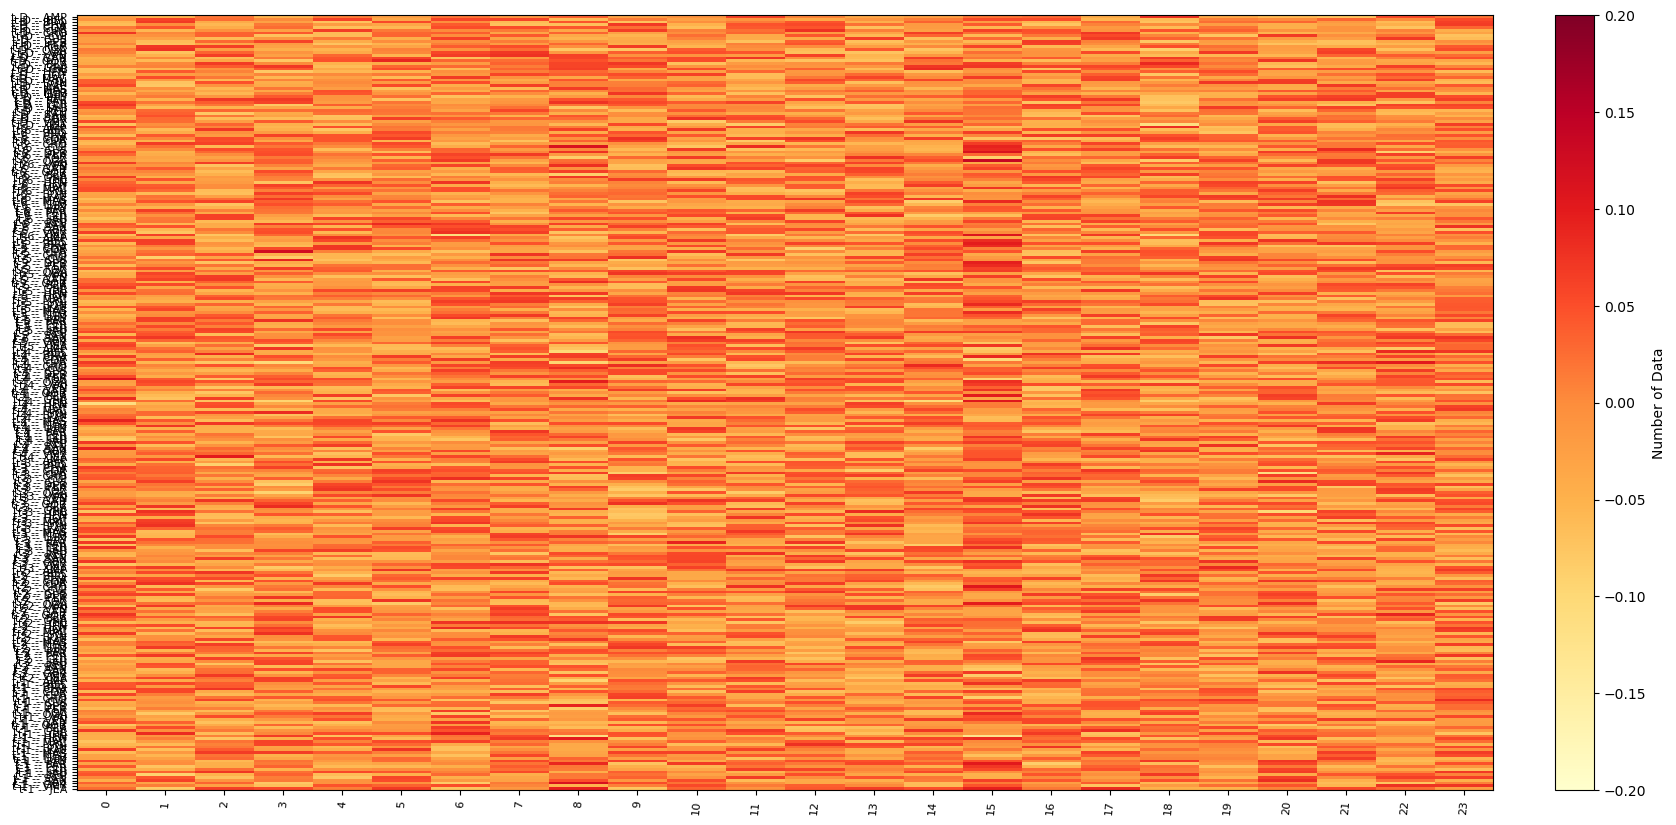

In [10]:
adaptive_Q = trainer.model.global_s_attn.netmob_POIs.model.init_adaptive_query
# adaptive_Q = adaptive_Q.transpose(0,1)
adaptive_Q = adaptive_Q.reshape(-1,adaptive_Q.size(-1))
adaptive_Q = pd.DataFrame(adaptive_Q.detach().cpu().numpy(),
                                columns = np.arange(adaptive_Q.size(-1)),
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in ds.spatial_unit]
                                ) 

plot_coverage_matshow(adaptive_Q, cmap ="YlOrRd", save = None, 
                      cbar_label =  "Number of Data",bool_reversed=False, 
                    v_min=-0.2,v_max=0.2,
                      bool_plot = True, cbar_magic_args = True, figsize = figsize)

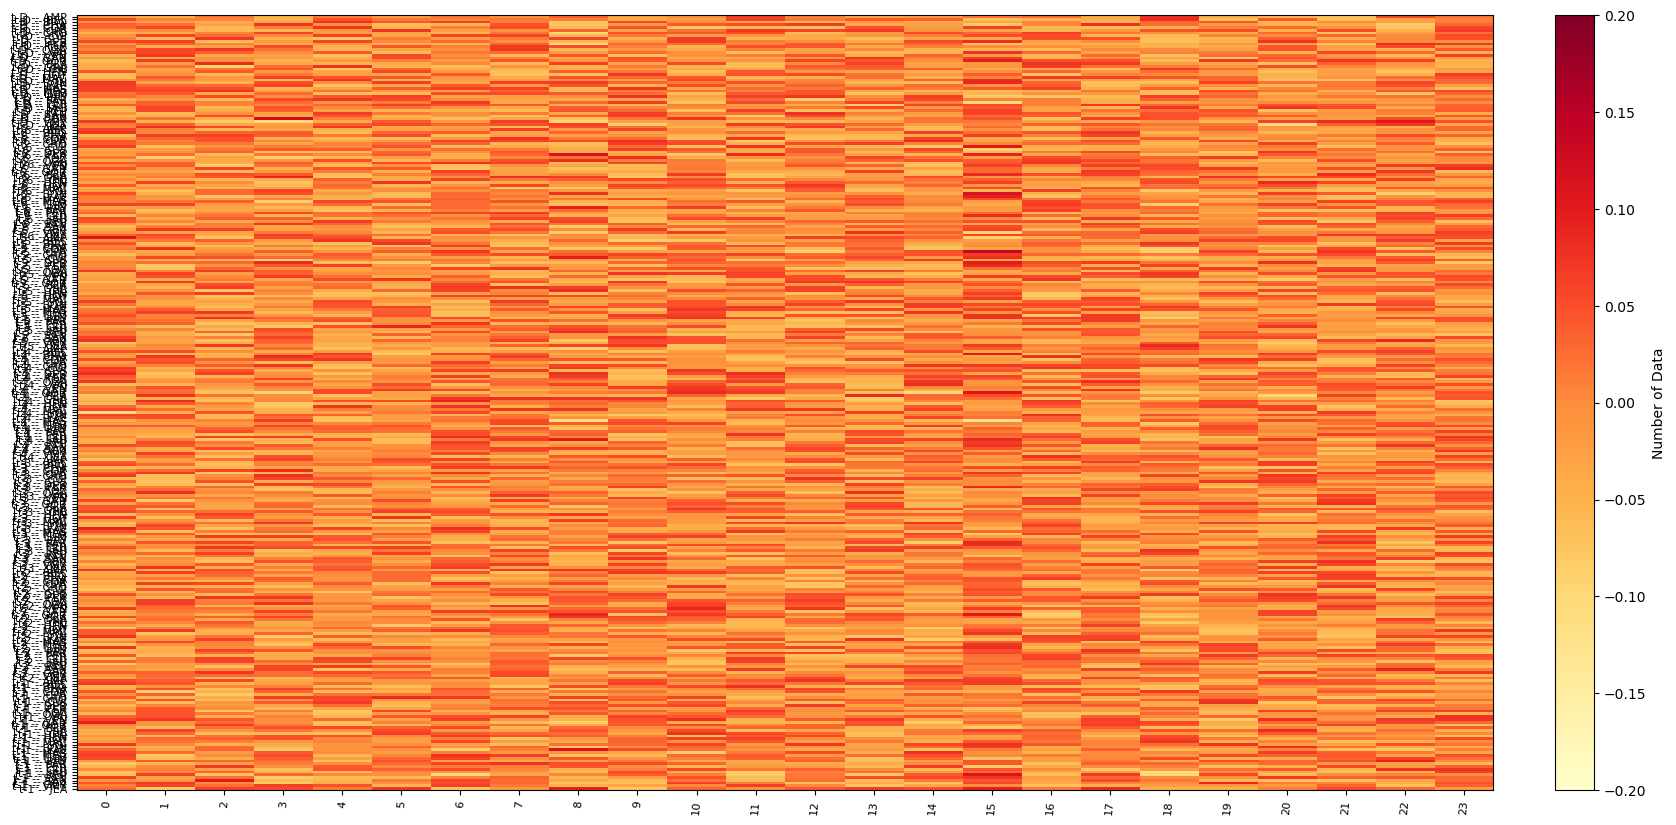

In [9]:
import numpy as np 

adaptive_Q = trainer.model.global_s_attn.netmob_POIs.model.init_adaptive_query
# adaptive_Q = adaptive_Q.transpose(0,1)
adaptive_Q = adaptive_Q.reshape(-1,adaptive_Q.size(-1))
adaptive_Q = pd.DataFrame(adaptive_Q.detach().cpu().numpy(),
                                columns = np.arange(adaptive_Q.size(-1)),
                                index = [f"{hist} -- {s_unit}" for hist in t_columns for s_unit in ds.spatial_unit]
                                ) 

plot_coverage_matshow(adaptive_Q, cmap ="YlOrRd", save = None, 
                      cbar_label =  "Number of Data",bool_reversed=False, 
                    v_min=-0.2,v_max=0.2,
                      bool_plot = True, cbar_magic_args = True, figsize = figsize)